In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [148]:
n = 10

In [149]:
# Set delta as in the paper
rho = 1.0
# delta = np.random.normal(0.5 * n, 0.05 * n, n)
delta = np.array([float(2 * n - i) for i in range(0, n)])
delta = np.sort(delta)
print(delta)

[ 11.  12.  13.  14.  15.  16.  17.  18.  19.  20.]


In [150]:
# Set zeta
# zeta = np.random.normal(0, 1, n)
zeta = np.array([float(n - i) for i in range(0, n)])
print(zeta)

[ 10.   9.   8.   7.   6.   5.   4.   3.   2.   1.]


In [151]:
def spectral_func(rho, delta, zeta, x):
    return rho + np.sum(zeta ** 2 / (delta - x))

In [39]:
def spectral_func_prime(delta, zeta, x):
    return np.sum(zeta ** 2/(delta - x) ** 2)

In [40]:
def g_spectral_func(rho, delta, zeta, x, k):
    if k == delta.shape[0]:
        k -= 1
    delta_reduced = np.delete(delta, [k, k+1])
    zeta_reduced = np.delete(zeta, [k, k+1])
    return spectral_func(rho, delta_reduced, zeta_reduced, x)

In [175]:
def h_spectral_func(rho, delta, zeta, x, k):
    if k == delta.shape[0]:
        k -= 1
    delta_reduced = delta[k : k+2]
    zeta_reduced = zeta[k : k+2]
    return spectral_func(rho, delta_reduced, zeta_reduced, x) - rho

In [42]:
def discriminant_formula_interior(a, b, c):
    if a <= 0:
        return float(a - np.sqrt(a ** 2 - 4 * b * c)) / float (2 * c)
    else:
        return float(2 * b) / float(a + np.sqrt(a ** 2 - 4 * b * c))

In [43]:
def discriminant_formula_exterior(a, b, c):
    if a >= 0:
        return float(a + np.sqrt(a ** 2 - 4 * b * c)) / float (2 * c)
    else:
        return float(2 * b) / float(a - np.sqrt(a ** 2 - 4 * b * c))

In [44]:
def interior_init(rho, delta, zeta, k):
    middle = float(delta[k] + delta[k+1]) / 2.0
    c = g_spectral_func(rho, delta, zeta, middle, k)
    d = delta[k+1] - delta[k]
    if spectral_func(rho, delta, zeta, middle) >= 0:
        a = c * d + zeta[k] ** 2 + zeta[k+1] ** 2
        b = zeta[k] ** 2 * d
        return discriminant_formula_interior(a, b, c) + delta[k]
    else:
        a = - c * d + zeta[k] ** 2 + zeta[k+1] ** 2
        b = - zeta[k + 1] ** 2 * d
        return discriminant_formula_interior(a, b, c) + delta[k + 1]    

In [176]:
def exterior_init(rho, delta, zeta):
    n = delta.shape[0]
    delta_n = delta[n - 1] + np.linalg.norm(zeta) ** 2 / float(rho)
    middle = float(delta[n - 1] + delta_n) / 2.0
    if spectral_func(rho, delta, zeta, middle) <= 0:
        if g_spectral_func(rho, delta, zeta, middle, n - 2) <= - h_spectral_func(rho, delta, zeta, delta_n, n - 2):
            return delta_n
        else:
            d = delta[n - 1] - delta[n - 2]
            c = g_spectral_func(rho, delta, zeta, middle, n - 2)
            a = - c * d +  zeta[n - 2] ** 2 + zeta[n - 1] ** 2
            b = - zeta[n - 1] ** 2 * d
            return discriminant_formula_exterior(a, b, c) + delta_n
    else:
        d = delta[n - 1] - delta[n - 2]
        c = g_spectral_func(rho, delta, zeta, middle, n - 2)
        a = - c * d +  zeta[n - 2] ** 2 + zeta[n - 1] ** 2
        b = - zeta[n - 1] ** 2 * d
        return discriminant_formula_exterior(a, b, c) + delta_n

In [177]:
y = np.zeros((n, ))
for k in range(0, n-1):
    y[k] = interior_init(rho, delta, zeta, k)
y[n - 1] = exterior_init(rho, delta, zeta)

In [178]:
y

array([  11.43816688,   12.56795621,   13.66760083,   14.74581516,
         15.80981988,   16.86452109,   17.91250939,   18.95404378,
         19.98609551,  405.        ])

In [154]:
def spectral_func_second(delta, zeta, x):
    return np.sum(2.0 * zeta ** 2 / (delta - x) ** 3)

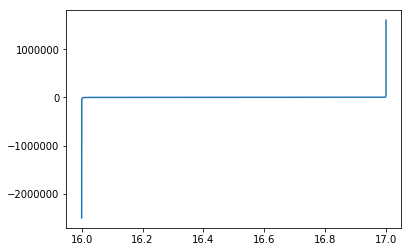

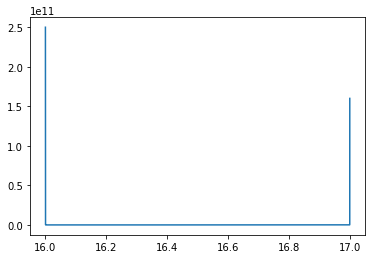

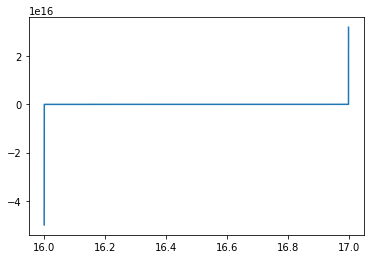

In [155]:
# Plot the functions between delta[k] and delta[k+1]
test_spectral = lambda x: spectral_func(rho, delta, zeta, x)

# Prime derivative
test_spectral_prime = lambda x: spectral_func_prime(delta, zeta, x)

test_spectral_second = lambda x: spectral_func_second(delta, zeta, x)

# Slight perturbation to avoid divergence on the plot
epsilon = 0.00001
k = 5
linspace = np.linspace(delta[k] + epsilon, delta[k+1] - epsilon, 10000)

# Compute the values and plot the original function
values = [test_spectral(x) for x in linspace]
plt.figure()
plt.plot(linspace, values)

# Compute the values and plot the derivative
values_prime = [test_spectral_prime(x) for x in linspace]
plt.figure()
plt.plot(linspace, values_prime)

# Compute the values and plot the second derivative
values_prime = [test_spectral_second(x) for x in linspace]
plt.figure()
plt.plot(linspace, values_prime)

# Show
plt.show()

In [179]:
def abc_gragg_interior(rho, delta, zeta, x, k):
    f = spectral_func(rho, delta, zeta, x)
    fprime = spectral_func_prime(delta, zeta, x)
    fsecond = spectral_func_second(delta, zeta, x)
    delta_k = delta[k] - x
    delta_kplus1 = delta[k+1] - x
    c = f - (delta_k + delta_kplus1) * fprime + delta_k * delta_kplus1 * fsecond / 2.0
    b = delta_k * delta_kplus1 * f
    a = (delta_k + delta_kplus1) * f - delta_k * delta_kplus1 * fprime 
    return a, b, c

In [180]:
def find_root_interior(rho, delta, zeta, x0, k, maxit, epsilon):
    i = 0
    f = 2 * np.sqrt(epsilon)
    x = x0
    while (np.abs(f) > epsilon) and (i < maxit):
        a, b, c = abc_gragg_interior(rho, delta, zeta, x, k)
        eta = discriminant_formula_interior(a, b, c)
        x += eta 
        f = spectral_func(rho, delta, zeta, x)
        i += 1
    return x

In [190]:
def find_root_exterior(rho, delta, zeta, x0, maxit, epsilon):
    i = 0
    f = 2 * epsilon
    x = x0
    while (np.abs(f) > epsilon) and (i < maxit):
        a, b, c = abc_gragg_interior(rho, delta, zeta, x, n - 2)
        print(a)
        print(b)
        print(c)
        eta = discriminant_formula_exterior(a, b, c)
        x += eta 
        f = spectral_func(rho, delta, zeta, x)
        i += 1
    print(i)
    return x

In [182]:
ytest = []
for k in range(0, n-1):
    ytest.append(find_root_interior(rho, delta, zeta, y[k], k, 10000, 1e-10))

In [183]:
ytest

[11.44119762080083,
 12.560343874504827,
 13.648764477558153,
 14.72313717745962,
 15.788960584876049,
 16.848464222555499,
 17.902160232228372,
 18.948871582606856,
 19.984634191202023]

In [191]:
ytest_ext = find_root_exterior(rho, delta, zeta, y[n-1], 1000, 1e-10)

-386.110332086
2596.65587356
0.999719147442
-372.421211562
-0.000233511418882
0.999703936072
2


In [185]:
spectral_func(rho, delta, zeta,ytest_ext)

1.1102230246251565e-16

In [188]:
ytest_ext

398.15346603620776

In [187]:
y[n-1]

404.99999999999994

In [164]:
ytest

[11.44119762080083,
 12.560343874504827,
 13.648764477558153,
 14.72313717745962,
 15.788960584876049,
 16.848464222555499,
 17.902160232228372,
 18.948871582606856,
 19.984634191202023]

In [165]:
fcontrol = [spectral_func(rho, delta, zeta, t) for t in ytest]

In [166]:
print(fcontrol)

[-3.2862601528904634e-14, 4.6329606817607782e-13, -1.170175067954915e-13, 4.4442227675745016e-13, -2.6423307986078726e-13, -7.560618797697316e-13, 6.8889338677990963e-13, 1.2386758285742872e-12, -3.5527136788005009e-13]


In [147]:
spectral_func(rho, delta, zeta, 11.441197)

-0.00050397036948690577

In [145]:
spectral_func_prime(delta, zeta, 86115.148438)

5.193189794583645e-08

In [146]:
spectral_func_second(delta, zeta, 86115.148438)

-1.2062877671880441e-12

In [174]:
spectral_func(rho, delta, zeta, 11.441197)

-0.00050397036948690577